# PROGETTO GAME SALES

## A cura di
## *Bria Simone mat. 224434*
## *Cosentino Cristian 224445*
***
# Introduzione
Il dataset che andremo ad analizzare contiene una lista di videogiochi con vendite superiori a 100.000 copie.  
L'obiettivo di questo progetto è di addestrare una collezione di algoritmi per predire le vendite di un videogioco in un determinato paese.

Le analisi del nostro progetto si dividono, principalmente, in tre fasi:

- Pre-processing  
- Classificazione  
- Post-processing

Le prime due sono le fasi principali, nelle quali creiamo la versione finale del dataset e tramite esso otteniamo vari modelli di classificazione.  
L'ultima fase, è utile per modificare degli aspetti del dataset in modo da ottenere dei risultati di classificazione migliori.  
Il post-processing viene effettuato solamente sui classificatori che hanno ottenuto i risultati migliori. Quindi, questa fase è come se fosse una sotto-sezione della fase di classificazione.
***
# Indice

# 1. Pre-processing
    1.1 Informazioni generali del dataset
    1.2 Analisi, statistiche e correlazione tra gli attributi
    1.3 Dataset finale
    
# 2. Modelli di classificazione
      2.1 Clustering
      2.2 Vari modelli di classificazione
         2.2.1 Training e Performance dei modelli
         2.2.2 Ensemble
         2.2.3 Post-Processing

# 3. Conclusioni
***

# Pre-processing
In questa prima sezione andremo ad analizzare il dataset e ad effettuare delle statistiche sugli attributi. Cercando di capire quali attributi sono importanti, quali bisogna modificare, affinchè si possano ottenere dei buoni modelli di classificazione, e quali di essi vadano eliminati.

## 1.1 Informazioni generali del dataset
Per iniziare, importiamo il dataset e cerchiamo di ottenere semplici informazioni riguardo la dimensione e statistiche sulle colonne.

In [142]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-notebook')

df = pd.read_csv('videogame_sales_data.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In totale sono presenti 11 attributi, la cui descrizione di ognuno di essi è riportata qui sotto:

- **Rank** - Posizionamento nella classifica generale delle vendite
- **Name** - Nome del gioco
- **Platform** - Piattaforma su cui è stato rilasciato il gioco (ad esempio PC,PS4, etc.)
- **Year** - Anno di rilascio del gioco
- **Genre** - Genere del gioco
- **Publisher** - Casa produttrice del gioco
- **NA_Sales** - Vendite in Nord America (in milioni)
- **EU_Sales** - Vendite in Europa (in milioni)
- **JP_Sales** - Vendite in Giappone (in milioni)
- **Other_Sales** - Vendite nel resto del mondo (in milioni)
- **Global_Sales** - Totale vendite nel mondo

Ora controlliamo la dimensione del dataset, per capire con quante entry abbiamo a che fare.

In [143]:
df.shape

(16598, 11)

Verifico quante entries sono presenti per ciascun attributo, così da verificare la presenza di valori nulli.

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Controlliamo ora le colonne con valori nulli utilizzando la funzione isnull function e grafichiamo i dati tramite una heatmap per vedere esattamente  dove si trovano maggiormente i valori mancanti per ulteriori valutazioni.

In [145]:
df.isnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


Mostriamo tutti i dati mancanti tramite una rappresentazione grafica con *heatmap*

<AxesSubplot:>

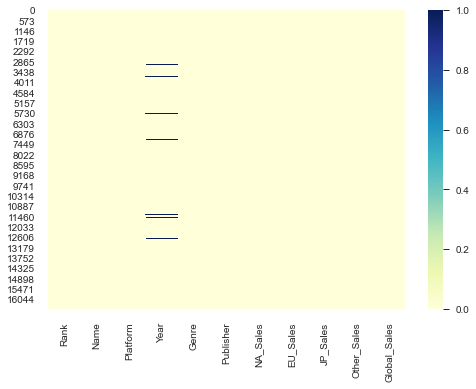

In [146]:
sns.heatmap(df.isnull(), cmap="YlGnBu")

Possiamo vedere che ci sono dei valori mancanti nelle colonne **Publisher** e **Year**. Cerchiamo quindi di riempirli con dei valori correlati

In [147]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Andiamo a descrivere in maniera generale il dataset al fine di risalire ad informazioni utili in questa fase.

In [148]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Potremmo pensare di eliminare i valori mancanti ma questo comporterebbe una perdita nel dataset. Andiamo quindi a sfruttare le informazioni ausiliarie sopra ricavate (come ad esempio la media) per colmare questa lacuna.

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

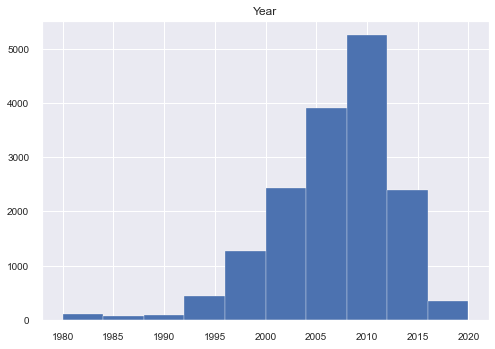

In [149]:
df.hist(column="Year")

Andiamo a effettuare la sostituzione dei valori *null* con il loro valore medio.  
Effettuiamo questa sostituzione in quanto abbiamo pochi valori null rispetto al totale (278 su 16.598), ovvero circa 1.5% del totale.  
Nel caso in cui avessimo avuto un quantitativo significativo di valori nan questa procedura avrebbe portato ad una sottostima della variazione dei dati. 

In [150]:
mean = df['Year'].mean()
df['Year'].fillna(mean, inplace=True)

Rappresentiamo nuovamente la *heatmap* per vedere se l'operazione è andata a buon fine

<AxesSubplot:>

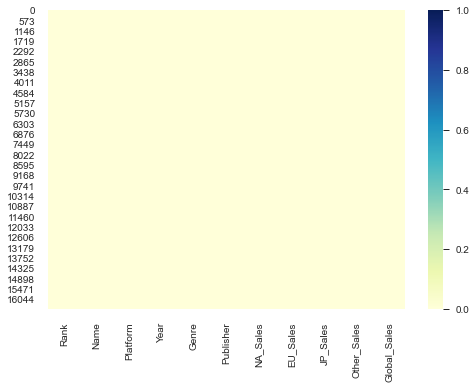

In [151]:
sns.heatmap(df.isnull(), cmap="YlGnBu")

Come possiamo notare dal grafico precedente abbiamo correttamente sostituito i valori mancanti nel dataset relativi alla colonna **Year**.  
Effettuiamo una procedura analoga per la colonna **Publisher**. L'attributo in questione, tuttavia, non è un valore numerico.  
Di conseguenza, lo sostituiremo con un valore da noi scelto al fine di evitare valori mancanti nel dataset.

In [152]:
df['Publisher'].fillna('Other', inplace=True)

<AxesSubplot:>

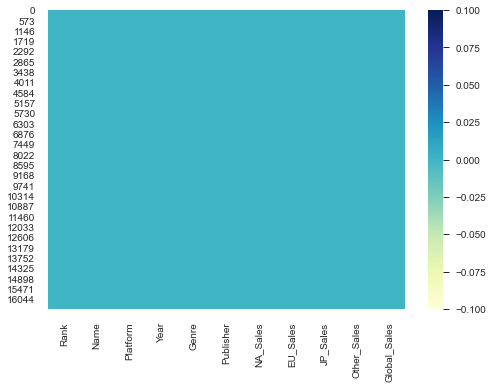

In [153]:
sns.heatmap(df.isnull(), cmap="YlGnBu")

Abbiamo gestito tutti i valori null presenti nel dataset e siamo pronti quindi per ulteriori step di pre-processing.

## 1.2 Analisi, statistiche e correlazione tra gli attributi

Prima di partire con la classificazione, effettuiamo delle analisi sui dati.  
Per prima cosa verifichiamo il genere di videogioco che ha avuto più successo.

In [154]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

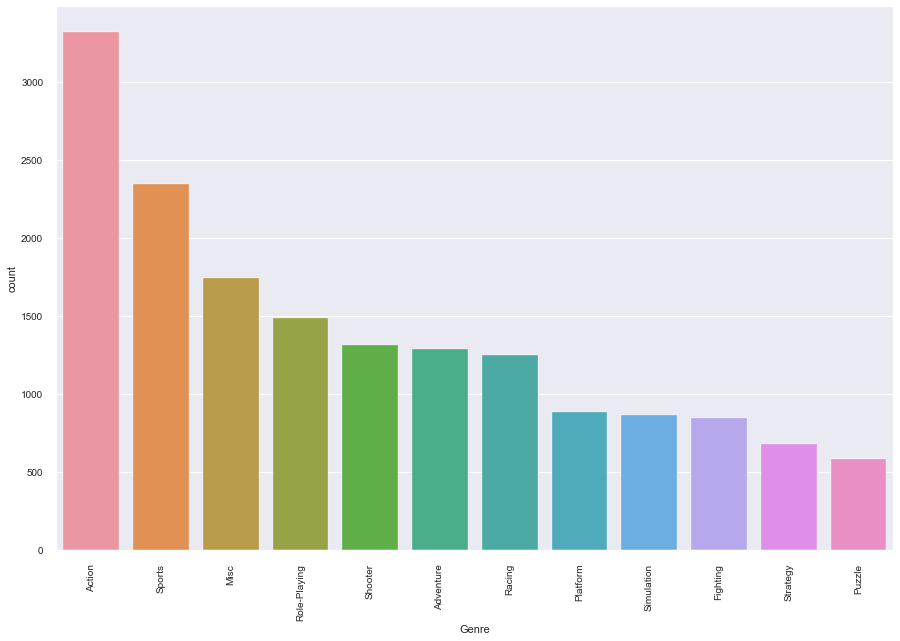

In [155]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index)
plt.xticks(rotation=90)

Dall'analisi si evince che il genere che ha avuto maggior successo è il genere di **Azione**.  
Ipotizziamo che questo valore sia dovuto al fatto che in alcuni Paesi vi è una forte vendita di titoli di questo genere e che quindi non ci sia un equa distribuzione delle vendite su questo attributo.  
Per verificare ciò mostriamo come, le vendite nei singoli paesi, sono correlate ai generi dei videogiochi.

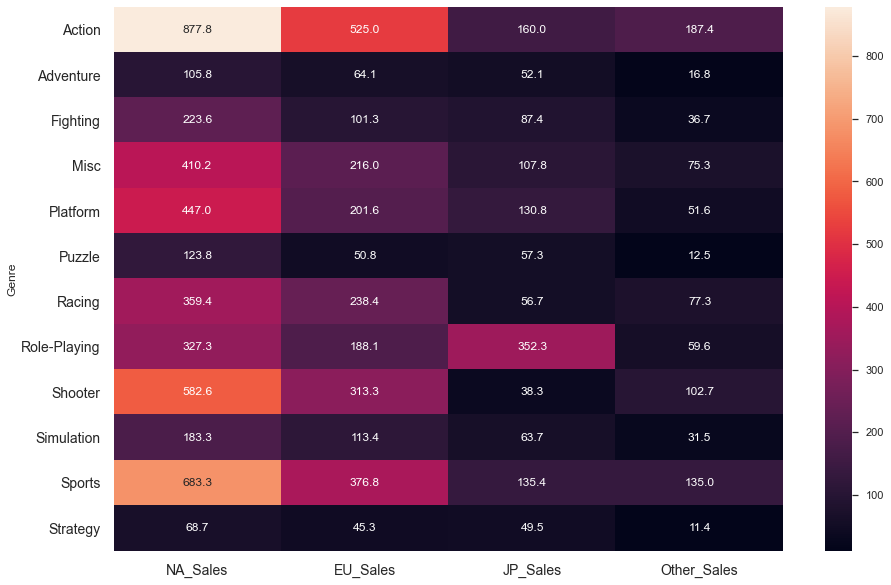

In [156]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()

plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Dalla matrice di correlazione si evince che i giochi d'azione sono maggiormente venduti in paesi quali Nord America e Europa. Oltre a questo, notiamo che il Nord America è il paese che incide maggiormente sulle vendite globali. Possiamo comprovare questa ipotesi grazie al seguente istogramma:

In [157]:
top_sale_reg = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


<AxesSubplot:xlabel='region', ylabel='sale'>

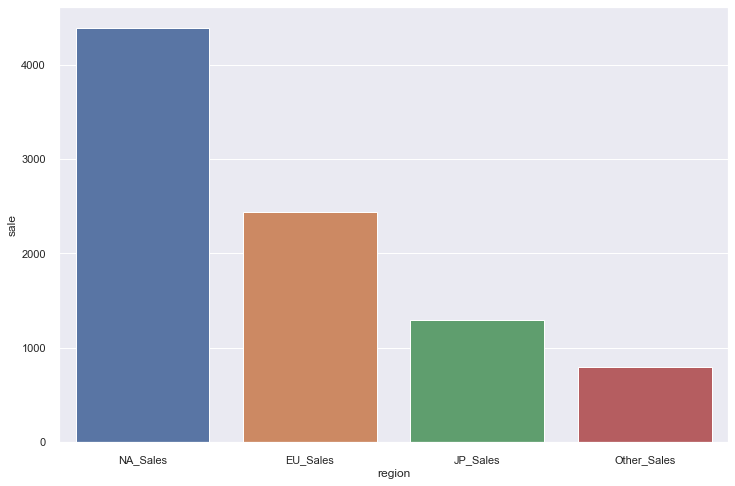

In [158]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

([<matplotlib.patches.Wedge at 0x14966eeb0>,
 [Text(-1.0997117266962277, 0.025181703016309925, 'NA_Sales'),
  Text(0.7981571088480199, -0.7569314563389279, 'EU_Sales'),
  Text(0.935642530069744, 0.5784229040457237, 'JP_Sales'),
  Text(0.30514884927416874, 1.0568274124882695, 'Other_Sales')],
 [Text(-0.5998427600161241, 0.013735474372532685, '49.3%'),
  Text(0.4353584230080108, -0.412871703457597, '27.3%'),
  Text(0.510350470947133, 0.3155034022067583, '14.5%'),
  Text(0.1664448268768193, 0.5764513159026924, '8.9%')])

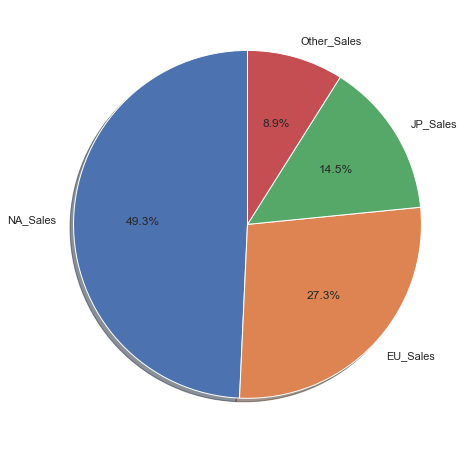

In [159]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

Il Nord America copre più del 50% delle vendite globali.  
Poiché effettueremo delle analisi sulle vendite suddivise per continenti, presentiamo dei grafici rappresentativi delle vendite suddivise per genere, anno o piattaforma.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Warner Bros. Interactive Entertainment'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

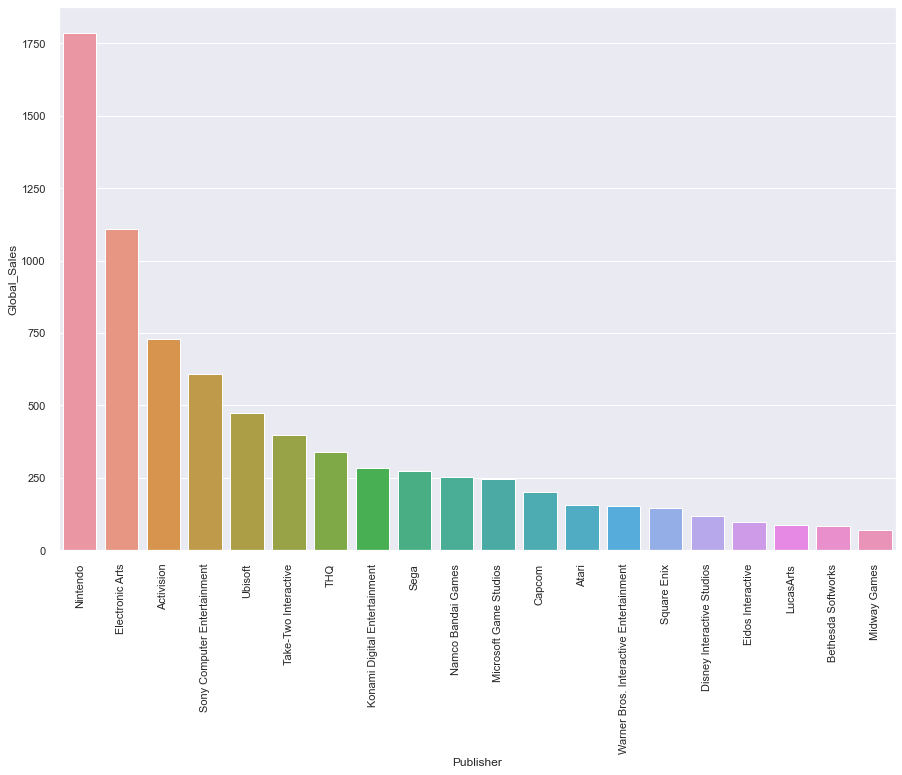

In [160]:
sale_pbl = df[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

Prima di inziare con la fase di discretizzazione andiamo a verificare il periodo di osservazione ricoperto da questo dataset

In [161]:
df_sort=df.sort_values(by=['Year'],ascending=True)
print("Inizio osservazione: " + str(int(df_sort['Year'].iloc[0])))
print("Fine osservazione: " + str(int(df_sort['Year'].iloc[len(df)-1])))

Inizio osservazione: 1980
Fine osservazione: 2020


Dovendo effettuare una classificazione in base alle vendite, verifichiamo che gli attributi siano distribuiti secondo una gaussiana e che non ci siano situazioni di squilibrio al loro interno.  
Per fare ciò utilizziamo una scala logaritmica.

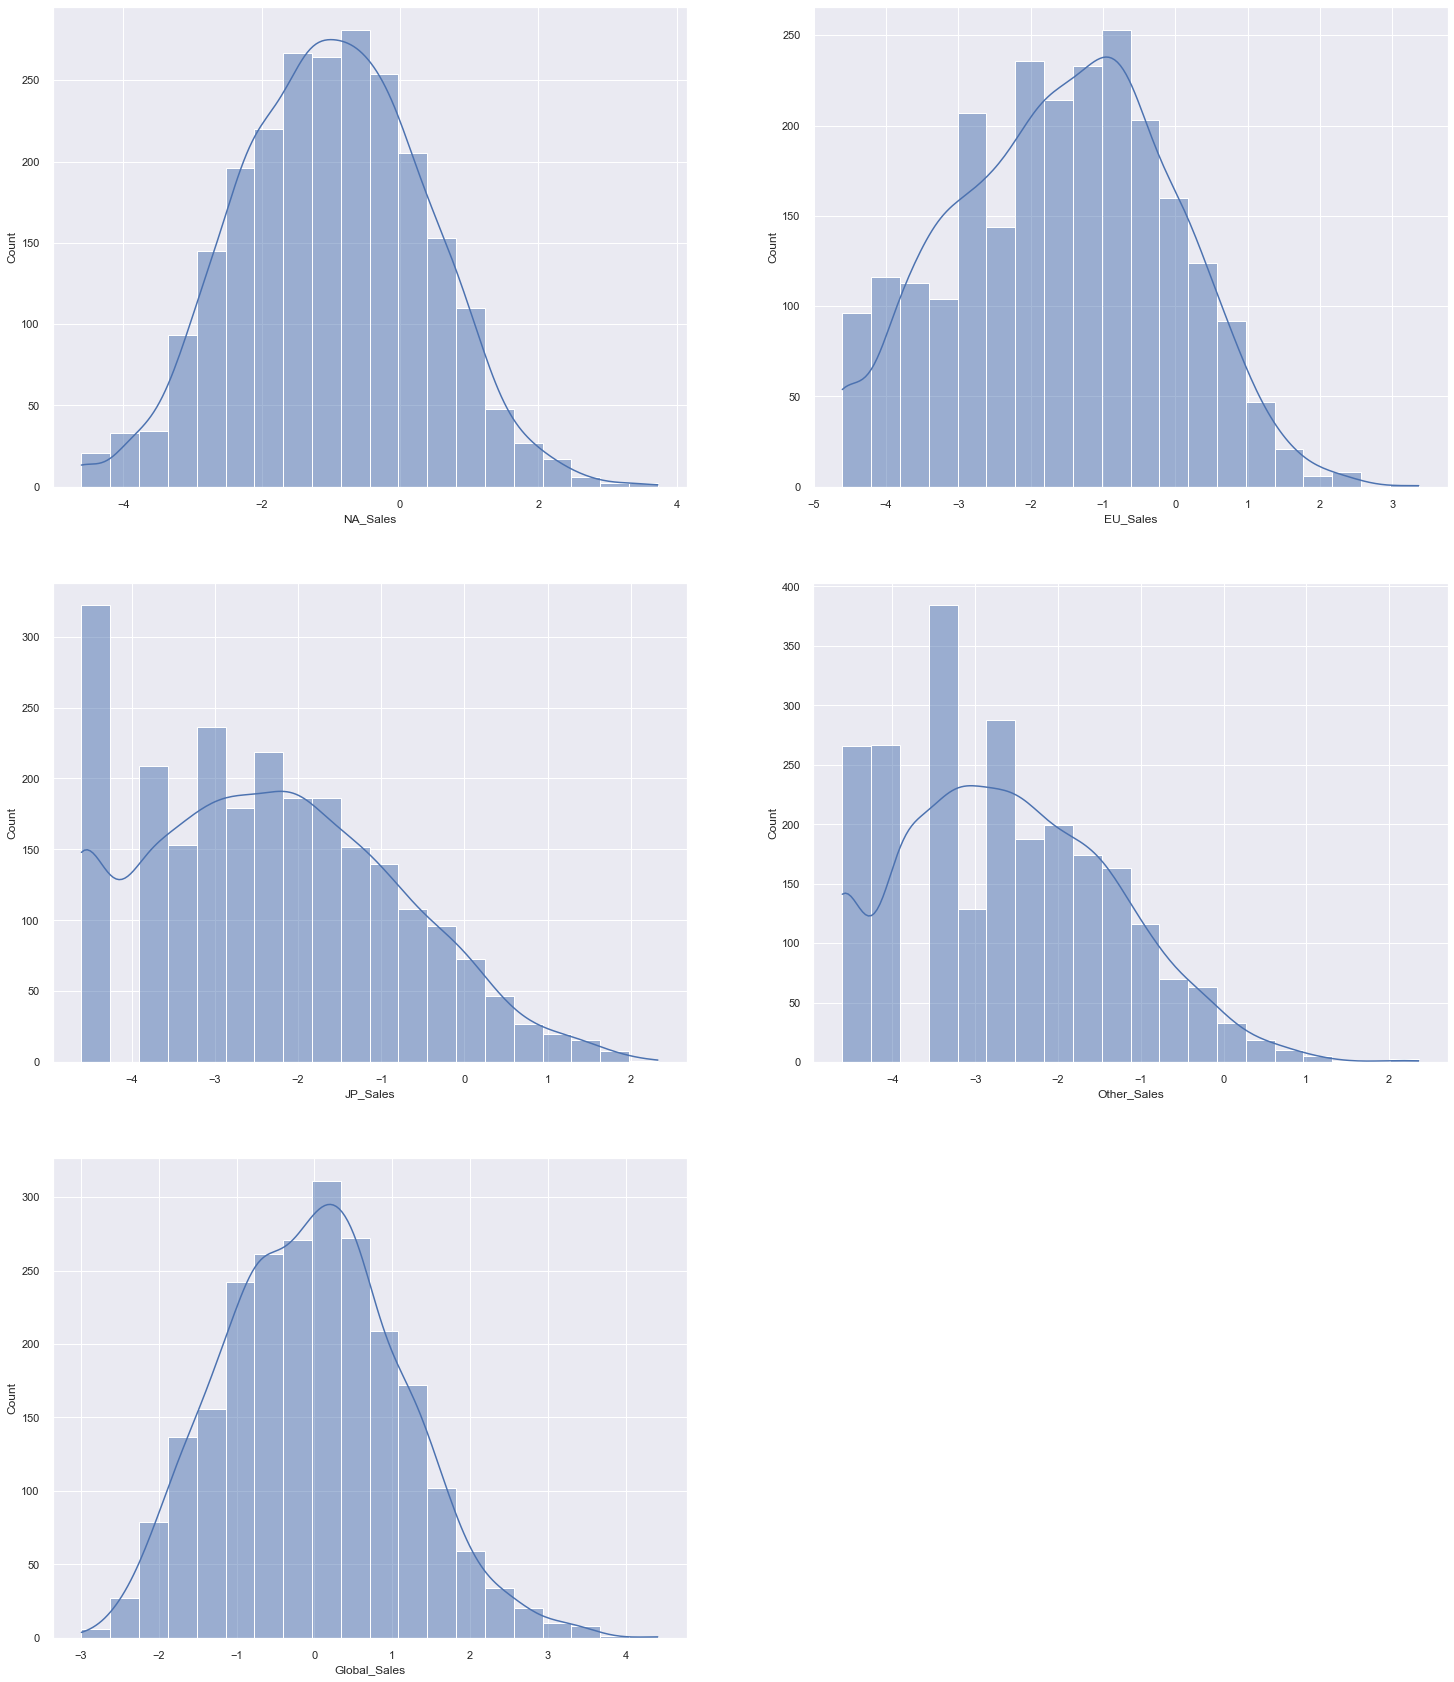

In [189]:
from scipy import stats

data_hist_log = df.copy()

data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.histplot(data=np.log(data_hist_log[column]), bins=20, kde=True)

## 1.3 Dataset Finale
Dopo aver effettuato tutte le modifiche agli attributi e dopo esserci accertati dell'effettiva importanza degli attributi rimanenti, abbiamo ottenuto la versione finale, che verrà utilizzata durante la classificazione, del nostro dataset.

In [ ]:
df

Una volta ottenuti i nostri attributi di riferimento, possiamo considerare concluso il preprocessing. L'ultimo passo è quello di dividere il test set dal train set, mantenendo in percentuale la stessa distribuzione di valori, considerando l'attributo sul quale effettueremo la classificazione, ovvero Global_Sales.  
Con scikitleran divido il dataset in train e test e controllo se la divisione rispecchia i parametri citati qui sopra.

In [ ]:
from sklearn.model_selection import train_test_split

training_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
training_set["Global_Sales"].hist(range=[0.0,1.0])

In [ ]:
test_set["Global_Sales"].hist(range=[0.0,1.0])